In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_3 as mc
from importlib import reload
reload(mc)


<module 'epri_mc_lib_3' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task3/NB/epri_mc_lib_3.py'>

In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)


In [3]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]


In [4]:
scaled_df = mc.scale_general(data_x, MinMaxScaler())[0]


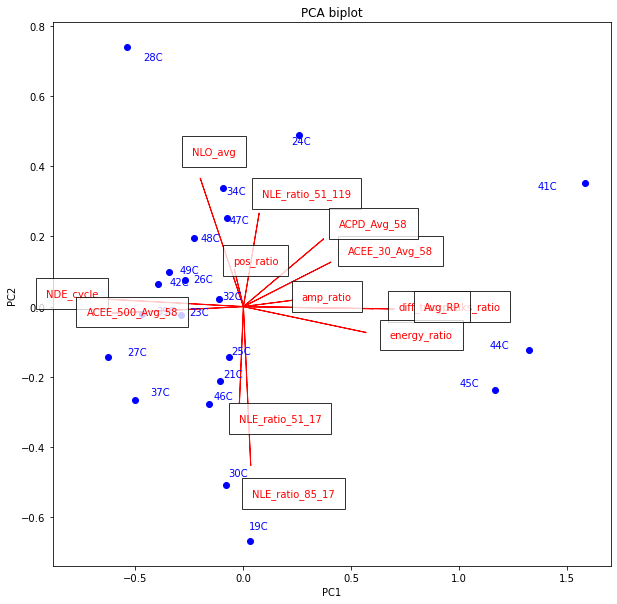

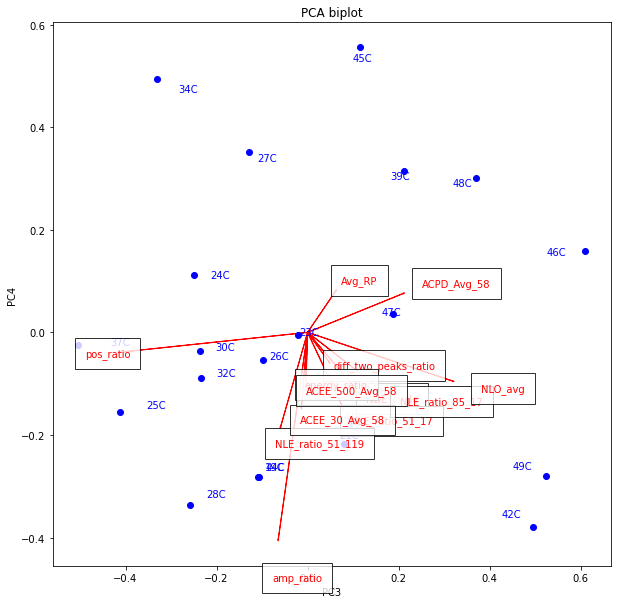

In [5]:
pca = PCA(n_components=4, svd_solver='full')
pca.fit(scaled_df)
mc.biplot(pca, scaled_df, 0, 1, "PCA biplot")    
mc.biplot(pca, scaled_df, 2, 3, "PCA biplot")    

Text(0, 0.5, 'Explained variance')

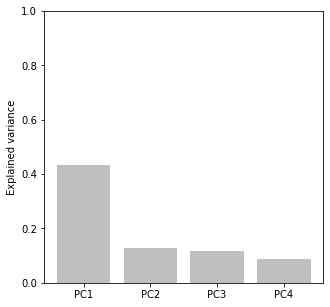

In [6]:
plt.figure(figsize=(5, 5))
plt.bar(["PC1","PC2","PC3","PC4"],pca.explained_variance_ratio_, align='center', alpha=0.5, color="gray")
plt.ylim(0,1)
plt.ylabel("Explained variance")

Text(0, 0.5, 'Explained variance')

<Figure size 432x432 with 0 Axes>

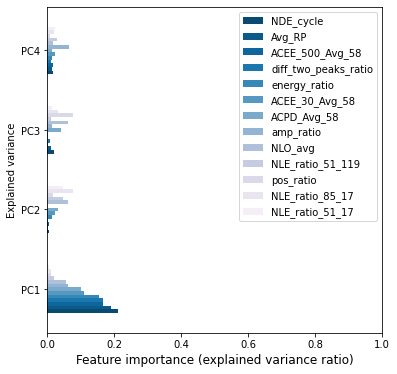

In [10]:
plt.figure(figsize=(6, 6))
feature_importance = pd.DataFrame([x*abs(y) for x,y in zip(pca.explained_variance_ratio_, pca.components_)],columns=scaled_df.columns, index=["PC1","PC2","PC3","PC4"] )
plot_feat_imp = feature_importance.transpose().sort_values('PC1', ascending=False).transpose()
plot_feat_imp.plot(kind='barh', color=sns.color_palette('PuBu_r', 13, desat=0.9), width=0.6, figsize=(6,6))
plt.xlabel('Feature importance (explained variance ratio)', fontsize = 12)
plt.xlim(0,1)
plt.ylabel("Explained variance")